In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part I - Basic Data Exploration

Load the dataset

In [2]:
path_to_dataset = "googleplaystore.csv"
google_play_store_df = pd.read_csv(path_to_dataset)

Display first 10 samples, using `.head(`) method

In [3]:
google_play_store_df.head(n=10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In EDA projects, I always like to see the column names using `.columns` attribute, rather than seeing it from table above.

In [4]:
google_play_store_df.columns.to_list()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [5]:
google_play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
google_play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
print(f'There are {len(google_play_store_df)} samples in the dataset.')

There are 10841 samples in the dataset.


# Part II - Missing Values and Data Types

As I inspect the results of `google_play_store_df.head(n=10)` and `google_play_store_df.info()`, I observed the following:

- The first thing my eye caught is that there is only one feature kept as `float64` `(Rating`)

- Every other features are kept as `object`. I know that the pandas keep `str` datatype as `object` in `dataframes`. However, even though the `Price` is something that is numerical in our life, it stored as `object`. Moreover, there are more quantative features as well, like `Reviews`, `Size` and `Installs`. Thanks to the flexibility of Python, (if needed), I can convert those into numerical (e.g., I can define a function that maps the "19M" to 19.000.000.000).

- There are total of 10841 rows in the dataset. However, there are some missing values, based on the results of `.info()` method call. For example, there are 10841-9367=1474 missing values for `Rating` column.

## 2.1. Check missing values

In [8]:
# I count missing values in each column of dataset, and store them in a dictionary
# keys: column names, corresponding values: count of missing values in that column
def get_missing_values_count_dict(df):
  results_dict = {}
  for col in google_play_store_df.columns:
    results_dict[col] = int(google_play_store_df[col].isna().sum())
  return results_dict

missing_value_count_dict = get_missing_values_count_dict(google_play_store_df)

There are lots of missing values for Rating column. Let's find the percentage.

In [9]:
missing_rating_percentage = google_play_store_df["Rating"].isna().sum() / len(google_play_store_df) * 100
missing_rating_percentage = round(float(missing_rating_percentage), 2)
missing_rating_percentage

13.6

Also let's take a look at the other columns with missing values

In [10]:
# List of column names with missing values
keys_missing_values = [key for key in missing_value_count_dict.keys() if missing_value_count_dict[key] != 0]

# Remove "Rating" from the list
keys_missing_values.remove("Rating")

keys_missing_values

['Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [11]:
google_play_store_df[google_play_store_df["Type"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [12]:
google_play_store_df[google_play_store_df["Content Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
google_play_store_df[google_play_store_df["Current Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [14]:
google_play_store_df[google_play_store_df["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
# Display rows with any missing values
google_play_store_df[google_play_store_df.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


## 2.2. Identify data types

In [16]:
google_play_store_df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


## 2.3. Check if each column has an appropriate data type.

In [17]:
google_play_store_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


• The first thing my eye caught is that there is only one feature kept as `float64` (Rating)


• Every other features are kept as `object`. I know that the pandas keep `str` datatype as `object` in dataframes. However, even though the Price is something that is numerical in our life, it stored as `object`. Moreover, there are more quantative features as well, like Reviews, Size and Installs. Thanks to the flexibility of Python, (if needed), I can convert those into numerical (e.g., I can define a function that maps the "19M" to 19.000.000.000).

## 2.4. Inspect categorical vs numerical columns

In [18]:
# Create list of numerical and categorical columns
numerical_columns = google_play_store_df.select_dtypes(include="number").columns.to_list()
categorical_columns = google_play_store_df.select_dtypes(exclude="number").columns.to_list()

In [19]:
numerical_columns

['Rating']

In [20]:
categorical_columns

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [21]:
google_play_store_df[numerical_columns].head(3)

,Rating
0,4.1
1,3.9
2,4.7


In [22]:
google_play_store_df[categorical_columns].head(3)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


## 2.5. Verify which columns are suitable for numerical analysis or visualization

In [23]:
# Remember the numerical columns in unmanipulated dataframe
numerical_columns

['Rating']

The only suitable column for numerical analysis or visualization in **unmanipulated dataframe** is Rating.

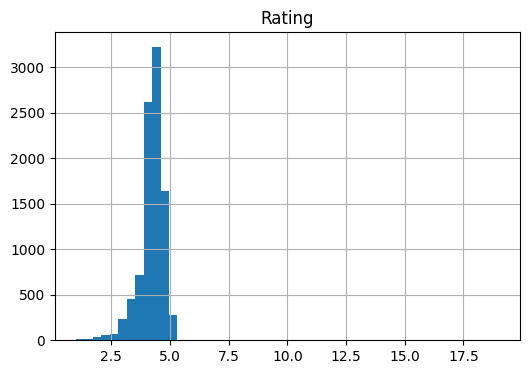

In [24]:
# df.hist() plots a histogram for each numerical attribute in google_play_store_df.
# Since the only numerical column (for now) is Rating, it only takes account this column.
google_play_store_df.hist(bins=50, figsize=(6, 4))
plt.show()

## 2.6. Handle incorrect datatypes

I noticed that there are duplicate rows in dataset.

In [25]:
# e.g.
google_play_store_df[google_play_store_df["App"] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [26]:
old_len = len(google_play_store_df)
google_play_store_df = google_play_store_df.drop_duplicates(subset=["App"], keep="first")

# number of removed duplicates
old_len - len(google_play_store_df)

1181

In [27]:
# Since some observations are removed, I reset the index
google_play_store_df = google_play_store_df.reset_index()

In [28]:
google_play_store_df.columns[0]

'index'

In [29]:
# Drop index column
google_play_store_df = google_play_store_df.drop("index", axis=1)

In [30]:
numerical_columns

['Rating']

In [31]:
categorical_columns

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

### 2.6.1. Converting Reviews column to numeric

In [32]:
try:
  google_play_store_df["Reviews"] = pd.to_numeric(google_play_store_df["Reviews"])
except ValueError as e:
  print(e)

Unable to parse string "3.0M" at position 9300


However, it seems that there is a string "3.0M" in 10472nd sample.

In [33]:
# Extract the erroneous sample from dataframe
erroneous_sample = google_play_store_df[google_play_store_df["Reviews"] == "3.0M"]

# display it
erroneous_sample

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As I inspected this sample, I noticed that some attributes shifted towards left. But the actual missing data for this observation is "Category". For example, 1.9, which is Category value for this entry is actually Rating of it, and 19.0 is actually its Reviews, Size of it is 3.0M, etc.

For now, I decide to remove it from my dataset. However, I'll keep it in a dictionary so I can manipulate & put it back if I need it later on.

In [34]:
# Extract this sample from the df & store it in a dictionary
erroneous_sample_dict = google_play_store_df.iloc[erroneous_sample.index].to_dict()
erroneous_sample_dict

# Remove this particular row from df
google_play_store_df = google_play_store_df.drop(axis=0, index=erroneous_sample.index)

In [35]:
# After removing the bad data, convert Reviews column to numeric
google_play_store_df["Reviews"] = pd.to_numeric(google_play_store_df["Reviews"])

In [36]:
google_play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
google_play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


### 2.6.2. Converting Size column to numeric


In [38]:
# Display unique values for Size column
google_play_store_df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Based on unique values for Size column, I think converting this column to numeric is a little bit more tricky than the Reviews column, because of the two reasons:

- Numerical values are represented as with suffix M or k. (e.g., 170k, 19M)
- Also, there are some samples with Size 'Varies with device'


In [39]:
# Number of samples with Size 'Varies with device'
len(google_play_store_df[google_play_store_df["Size"] == "Varies with device"])

1227

To convert Size feature to numeric, I'm going to follow this idea:

- Define a function that maps the string representations of sizes to their corresponding numeric values. For example, 170k will be mapped to the 170.000 while 19M will be mapped to 19.000.000 . Because pandas provides `apply` method (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).

- For Varies with device category, I will replace it with the mean of the existing numerical sizes.

In [40]:
# Convert single string size to corresponding numeric value
# e.g., 170k -> 170.000, 16M -> 16.000.000
def convert_str_size_to_numeric(str_size):
  if isinstance(str_size, int): return str_size
  if str_size.lower().endswith("k"):
    num_zeros = 3
  elif str_size.lower().endswith("m"):
    num_zeros = 6
  else:
    raise ValueError(f"{str_size} is invalid input.")

  return int(float(str_size[:-1]) * pow(10, num_zeros)) # specified slicing operation removes the last character of string (suffix)

The algorithm that I follow:

- First, replace "Varies with device" with 0 **temporarily**.

- Then, I use `pd.apply` method with `convert_str_size_to_numeric` function that I defined.

- Afterwards, calculate the mean of the Size. However, these temporary 0's must be discarded. Therefore, total number of elements is calculated via `(len(google_play_store_df) - len(google_play_store_df[google_play_store_df["Size"] == 0]))`.

- Finally, I filled those temporary 0s with `mean_of_size`.

In [41]:
google_play_store_df["Size"] = google_play_store_df["Size"].replace("Varies with device", 0)

google_play_store_df["Size"] = google_play_store_df["Size"].apply(convert_str_size_to_numeric)

mean_of_size = google_play_store_df["Size"].sum() / (len(google_play_store_df) - len(google_play_store_df[google_play_store_df["Size"] == 0]))

google_play_store_df["Size"] = google_play_store_df["Size"].replace(0, int(mean_of_size))

In [42]:
google_play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
google_play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   int64  
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.3+ MB


### 2.6.3. Converting Price column to numeric

In [44]:
google_play_store_df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

I noticed that not every Price values starts with dolar sign (e.g., '0')

In [45]:
def convert_raw_price_to_numeric(raw_price):
  price = raw_price[1:] if raw_price.startswith("$") else raw_price
  return float(price)

google_play_store_df["Price"] = google_play_store_df["Price"].apply(convert_raw_price_to_numeric)

In [46]:
google_play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   int64  
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


### temp - Installs

In [47]:
google_play_store_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [48]:
# Might be useful
def get_larger_install(i1, i2):
  i1_int = int(i1[:-1]) + 1 if i1.endswith("+") else int(i1)
  i2_int = int(i2[:-1]) + 1 if i2.endswith("+") else int(i2)
  return i1 if i1_int > i2_int else i2

In [49]:
get_missing_values_count_dict(google_play_store_df)

{'App': 0,
 'Category': 0,
 'Rating': 1463,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 1,
 'Price': 0,
 'Content Rating': 0,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 8,
 'Android Ver': 2}

In [50]:
missing_type_row = google_play_store_df[google_play_store_df["Type"].isna()]
missing_type_row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,Command & Conquer: Rivals,FAMILY,NaN,0,20395289,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [51]:
google_play_store_df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

For "Command & Conquer: Rivals" App, Price is 0.0, but Type is missing. Clearly, it should be "Free".

In [52]:
# Manipulate this row
google_play_store_df.loc[missing_type_row.index, "Type"] = "Free"

In [53]:
google_play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [54]:
get_missing_values_count_dict(google_play_store_df)

{'App': 0,
 'Category': 0,
 'Rating': 1463,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 0,
 'Price': 0,
 'Content Rating': 0,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 8,
 'Android Ver': 2}

In [55]:
google_play_store_df[google_play_store_df["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3549,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000000,"1,000+",Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
3586,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100000,"10,000+",Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN


### 2.6.4. Rating Column

In [56]:
# Count of missing values in Rating
google_play_store_df["Rating"].isna().sum()

np.int64(1463)

In [57]:
# Percentage of missing values in Rating
round(google_play_store_df["Rating"].isna().sum() / len(google_play_store_df) * 100, 2)

np.float64(15.15)

In [58]:
# Descriptive statistics for Rating
google_play_store_df["Rating"].describe()

,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


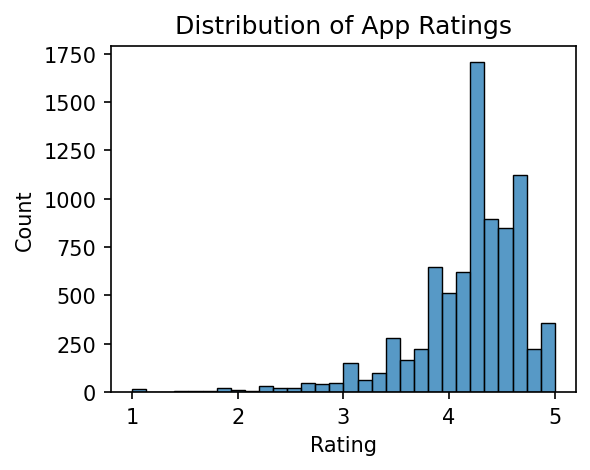

In [59]:
# Visualizing how ratings are distributed using histogram plot
plt.figure(figsize=(4,3), dpi=150)
sns.histplot(google_play_store_df["Rating"], bins=30)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.show()

To check if the missing Rating values were related to old apps, I looked at the Last Updated column for rows with missing ratings.

In [60]:
# Investigate whether missing Rating values are related to outdated Apps
google_play_store_df[google_play_store_df["Rating"].isna()]["Last Updated"].unique()

array(['March 7, 2018', 'September 20, 2017', 'July 23, 2018',
       'July 17, 2018', 'August 8, 2017', 'December 11, 2017',
       'January 24, 2018', 'July 13, 2018', 'June 15, 2018',
       'August 7, 2015', 'April 9, 2018', 'July 3, 2018',
       'September 1, 2017', 'July 25, 2017', 'August 2, 2018',
       'July 15, 2018', 'July 16, 2018', 'July 20, 2018', 'July 10, 2018',
       'July 26, 2018', 'July 9, 2018', 'July 31, 2018', 'July 27, 2018',
       'July 24, 2018', 'July 14, 2018', 'July 12, 2018', 'July 22, 2018',
       'July 11, 2018', 'August 3, 2018', 'July 30, 2018',
       'July 19, 2018', 'July 2, 2018', 'November 27, 2017',
       'July 4, 2018', 'June 28, 2018', 'July 8, 2018', 'May 30, 2018',
       'August 4, 2018', 'June 22, 2018', 'January 6, 2018',
       'June 23, 2018', 'September 19, 2017', 'December 28, 2017',
       'April 23, 2018', 'February 20, 2018', 'January 16, 2018',
       'January 2, 2017', 'November 5, 2017', 'November 16, 2017',
       'March 2

The update dates ranged from 2012 to 2018, and there was no clear pattern or specific time period.
This shows that the missing ratings are not caused by outdated data, but by apps that were released but not rated by users yet.

Following the guideline from Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (Aurélien Géron, 3rd Edition, p. 68), the least destructive approach to handle missing values is to impute them using the median. Therefore, I decided to fill the missing values in the Rating column with the median value of that attribute.

In [61]:
# Fill the missing ratings with median
median_rating = google_play_store_df["Rating"].median()
google_play_store_df["Rating"] = google_play_store_df["Rating"].fillna(median_rating)

### 2.6.5. Missing values in Current Ver and Android Ver

In [62]:
get_missing_values_count_dict(google_play_store_df)

{'App': 0,
 'Category': 0,
 'Rating': 0,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 0,
 'Price': 0,
 'Content Rating': 0,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 8,
 'Android Ver': 2}

Since there are 4 and 2 missing values individually, for Current Ver and Android Ver, I decided to drop these rows since the data loss is very slight. I want my resulting dataset to be as clean as possible.

In [63]:
google_play_store_df = google_play_store_df.dropna(axis=0, subset=["Current Ver", "Android Ver"])

In [64]:
get_missing_values_count_dict(google_play_store_df)

{'App': 0,
 'Category': 0,
 'Rating': 0,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 0,
 'Price': 0,
 'Content Rating': 0,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 0,
 'Android Ver': 0}

## 2.7. Discuss your findings:

- Is the column categorical or numerical?
- Are there missing or zero values that might need cleaning?
- Does the column need conversion before analysis?

### 2.7.1. App
This column is categorical and represents the name of each application. There are no missing values. It does not need any cleaning or conversion, but duplicates were removed earlier to ensure data accuracy.

### 2.7.2. Category
This column is categorical and shows which category each app belongs to (e.g., Tools, Family, Games). It has no missing values and is ready for analysis as is.

### 2.7.3. Rating
This column is numerical (float64) and represents user ratings from 1.0 to 5.0. About 15% of the values were missing. Since the missing ratings most likely belong to unrated apps, I decided to drop those rows instead of filling them with the mean or median.

### 2.7.4. Reviews
This column is numerical and counts the number of user reviews for each app. It was initially stored as an object because of one incorrect value (“3.0M”). After fixing and converting, it became a numeric column suitable for correlation or visualization.

### 2.7.5. Size
This column originally contained string values such as “19M” or “170k,” and some rows had “Varies with device.” It was converted to numeric values in bytes. “Varies with device” entries were replaced with the mean size, so the column is now consistent and ready for analysis

### 2.7.6. Installs
This column is categorical for now, since it includes symbols like “+” and commas (e.g., “1,000+”). It could later be cleaned and converted to numeric form for better comparison between apps, but this step has not been applied yet.

### 2.7.7. Type
This column is categorical (e.g., “Free” or “Paid”). One missing value was found and filled with “Free,” based on its price being 0.0. The column is now clean.

### 2.7.8. Price
This column originally contained strings such as “$2.99” or “0.” It was converted to numeric values, removing the dollar sign. The column is now numerical and ready for visualization and summary statistics.

### 2.7.9. Content Rating
This column is categorical (e.g., “Everyone,” “Teen,” “Mature 17+”). It has no missing values and does not require conversion.

### 2.7.10. Genres
This column is categorical and describes the genre of each app. It contains text values separated by semicolons (e.g., “Action;Adventure”), which could be split into multiple categories in deeper analysis. No cleaning was required for now.

### 2.7.11. Last Updated
This column is categorical (string dates). It shows when each app was last updated. It was used to check if missing ratings were related to outdated apps, but no clear relationship was found. The column was not converted, but it can be transformed into datetime type for future time-based analysis.

### 2.7.12. Current Ver
This column is categorical and contains app version strings (e.g., “1.0.5”). It had 4 missing values, which were dropped since the loss was very small. No further cleaning is needed.

### 2.7.13. Android Ver
This column is categorical and shows the minimum Android version required (e.g., “4.0 and up”). It had 2 missing values, which were also dropped. The column is clean and ready for analysis.

# Part III - Descriptive Statistics
In this part, I calculate summary statistics for both numerical and categorical columns.
I also explore distributions, unique counts, and top values to better understand the data.

In [65]:
google_play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int64  
 4   Size            9649 non-null   int64  
 5   Installs        9649 non-null   object 
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   float64
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [66]:
# Separate numerical & categorical columns again (after cleaning)
numerical_columns = google_play_store_df.select_dtypes(include=["int64", "float64"]).columns.to_list()
categorical_columns = google_play_store_df.select_dtypes(exclude=["int64", "float64"]).columns.to_list()

In [67]:
numerical_columns

['Rating', 'Reviews', 'Size', 'Price']

In [68]:
categorical_columns

['App',
 'Category',
 'Installs',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

## 3.1. Summary statistics for numerical columns

In [69]:
round(google_play_store_df[numerical_columns].describe(), 2)

,Rating,Reviews,Size,Price
count,9649.00,9649.00,9.649000e+03,9649.00
mean,4.19,216814.46,2.041157e+07,1.10
std,0.50,1832255.40,2.039761e+07,16.86
min,1.00,0.00,8.500000e+03,0.00
25%,4.00,25.00,5.300000e+06,0.00
50%,4.30,969.00,1.600000e+07,0.00
75%,4.50,29445.00,2.500000e+07,0.00
max,5.00,78158306.00,1.000000e+08,400.00


## 3.2. Summary information for categorical columns

In [70]:
print("-------------------------------------------------------------------------")
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique values: {google_play_store_df[col].nunique()}")
    print(f"Most frequent value: {google_play_store_df[col].mode()[0]}")
    print(f"Top 5 unique values:\n{google_play_store_df[col].value_counts().head(5)}")
    print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Column: App
Unique values: 9649
Most frequent value: "i DT" Fútbol. Todos Somos Técnicos.
Top 5 unique values:
App
iHoroscope - 2018 Daily Horoscope & Astrology    1
Cardio-FR                                        1
List iptv FR                                     1
PLMGSS FR                                        1
Poop FR                                          1
Name: count, dtype: int64
-------------------------------------------------------------------------
Column: Category
Unique values: 33
Most frequent value: FAMILY
Top 5 unique values:
Category
FAMILY      1829
GAME         959
TOOLS        825
BUSINESS     420
MEDICAL      395
Name: count, dtype: int64
-------------------------------------------------------------------------
Column: Installs
Unique values: 21
Most frequent value: 1,000,000+
Top 5 unique values:
Installs
1,000,000+     1416
100,000+       1112
10,000+        1029
10,000,000+     937
1

## 3.3. Visualize numerical distributions

In [71]:
numerical_columns

['Rating', 'Reviews', 'Size', 'Price']

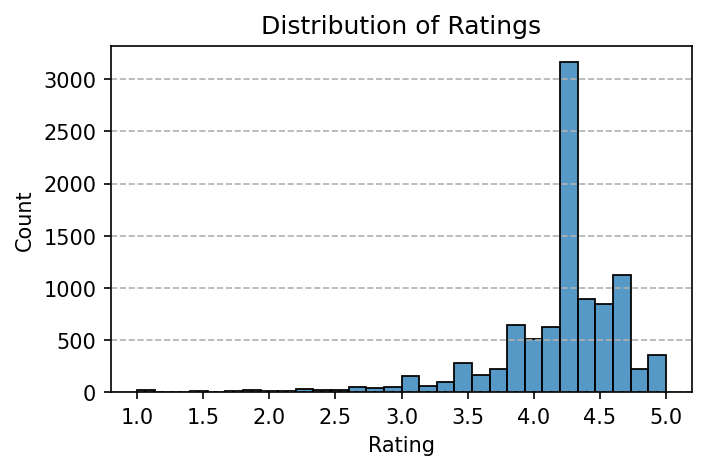

In [72]:
# Display Rating
plt.figure(figsize=(5,3), dpi=150)
sns.histplot(google_play_store_df["Rating"], bins=30)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--")

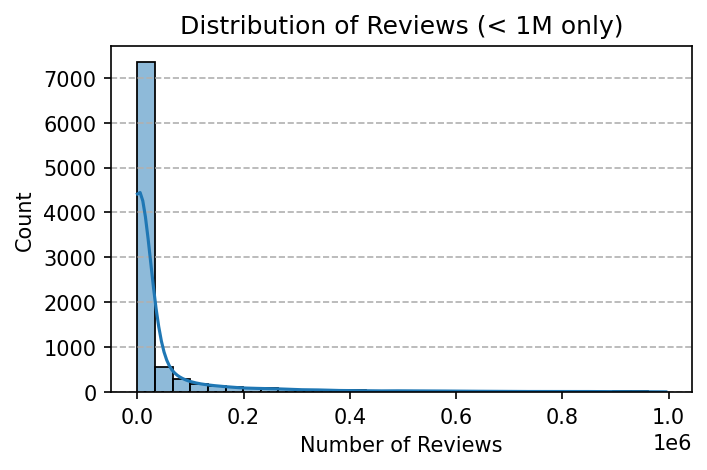

In [73]:
# Filter apps with review counts under 1M
subset = google_play_store_df[google_play_store_df["Reviews"] < 1_000_000]

plt.figure(figsize=(5, 3), dpi=150)
sns.histplot(subset["Reviews"], bins=30, kde=True)
plt.title("Distribution of Reviews (< 1M only)")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--")

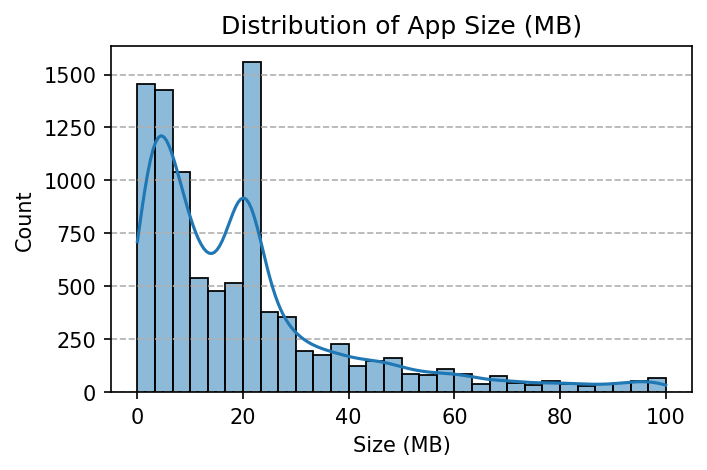

In [74]:
# Plot Size in MB
size_mb = google_play_store_df["Size"] / 1_000_000

plt.figure(figsize=(5,3), dpi=150)
sns.histplot(size_mb, bins=30, kde=True)
plt.title("Distribution of App Size (MB)")
plt.xlabel("Size (MB)")
plt.ylabel("Count")
plt.grid(axis="y", ls="--")

In [75]:
# number of free apps
len(google_play_store_df[google_play_store_df["Price"] == 0])

8896

In [76]:
# percentage of free apps
7588 / len(google_play_store_df) * 100

78.64027360348223

I noticed that majority of the Apps are free. (7588), based on the results above.

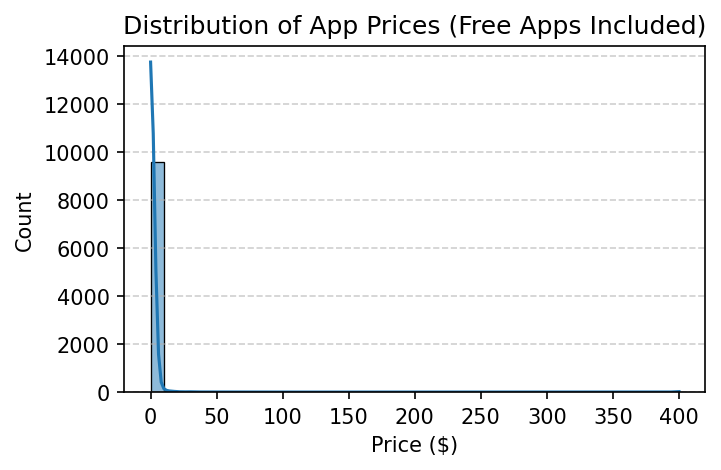

In [77]:
# Plot Price (free apps are also included)
plt.figure(figsize=(5, 3), dpi=150)
sns.histplot(google_play_store_df["Price"], bins=40, kde=True)
plt.title("Distribution of App Prices (Free Apps Included)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

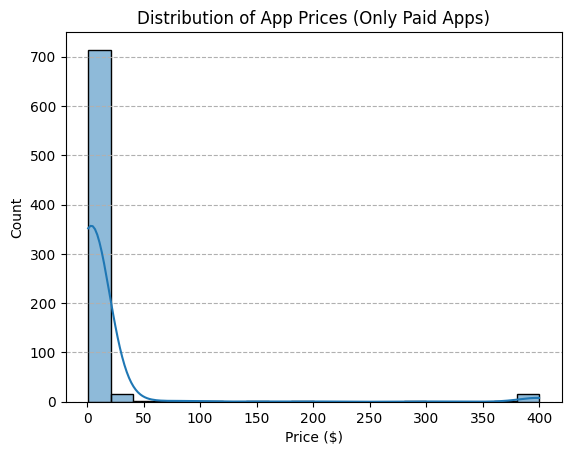

In [78]:
# Plot unfree apps (filtered)
paid_df = google_play_store_df[google_play_store_df["Price"] != 0]
sns.histplot(paid_df["Price"], bins=20, kde=True)
plt.title("Distribution of App Prices (Only Paid Apps)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--")
plt.show()

# Part IV - Research Queries and Analytical Insights

## 4.1. What are the top categories in terms of the number of apps?

In [79]:
# Sort Category column based on the frequency, and store it as a pandas Series
sorted_categories = google_play_store_df["Category"].value_counts().sort_values(ascending=False)
sorted_categories

,count
Category,
FAMILY,1829
GAME,959
TOOLS,825
BUSINESS,420
MEDICAL,395
PRODUCTIVITY,374
PERSONALIZATION,374
LIFESTYLE,369
FINANCE,345


In [80]:
# Top 10 categories
sorted_categories.head(n=10)

,count
Category,
FAMILY,1829
GAME,959
TOOLS,825
BUSINESS,420
MEDICAL,395
PRODUCTIVITY,374
PERSONALIZATION,374
LIFESTYLE,369
FINANCE,345


/tmp/ipython-input-441894145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sorted_categories.index,


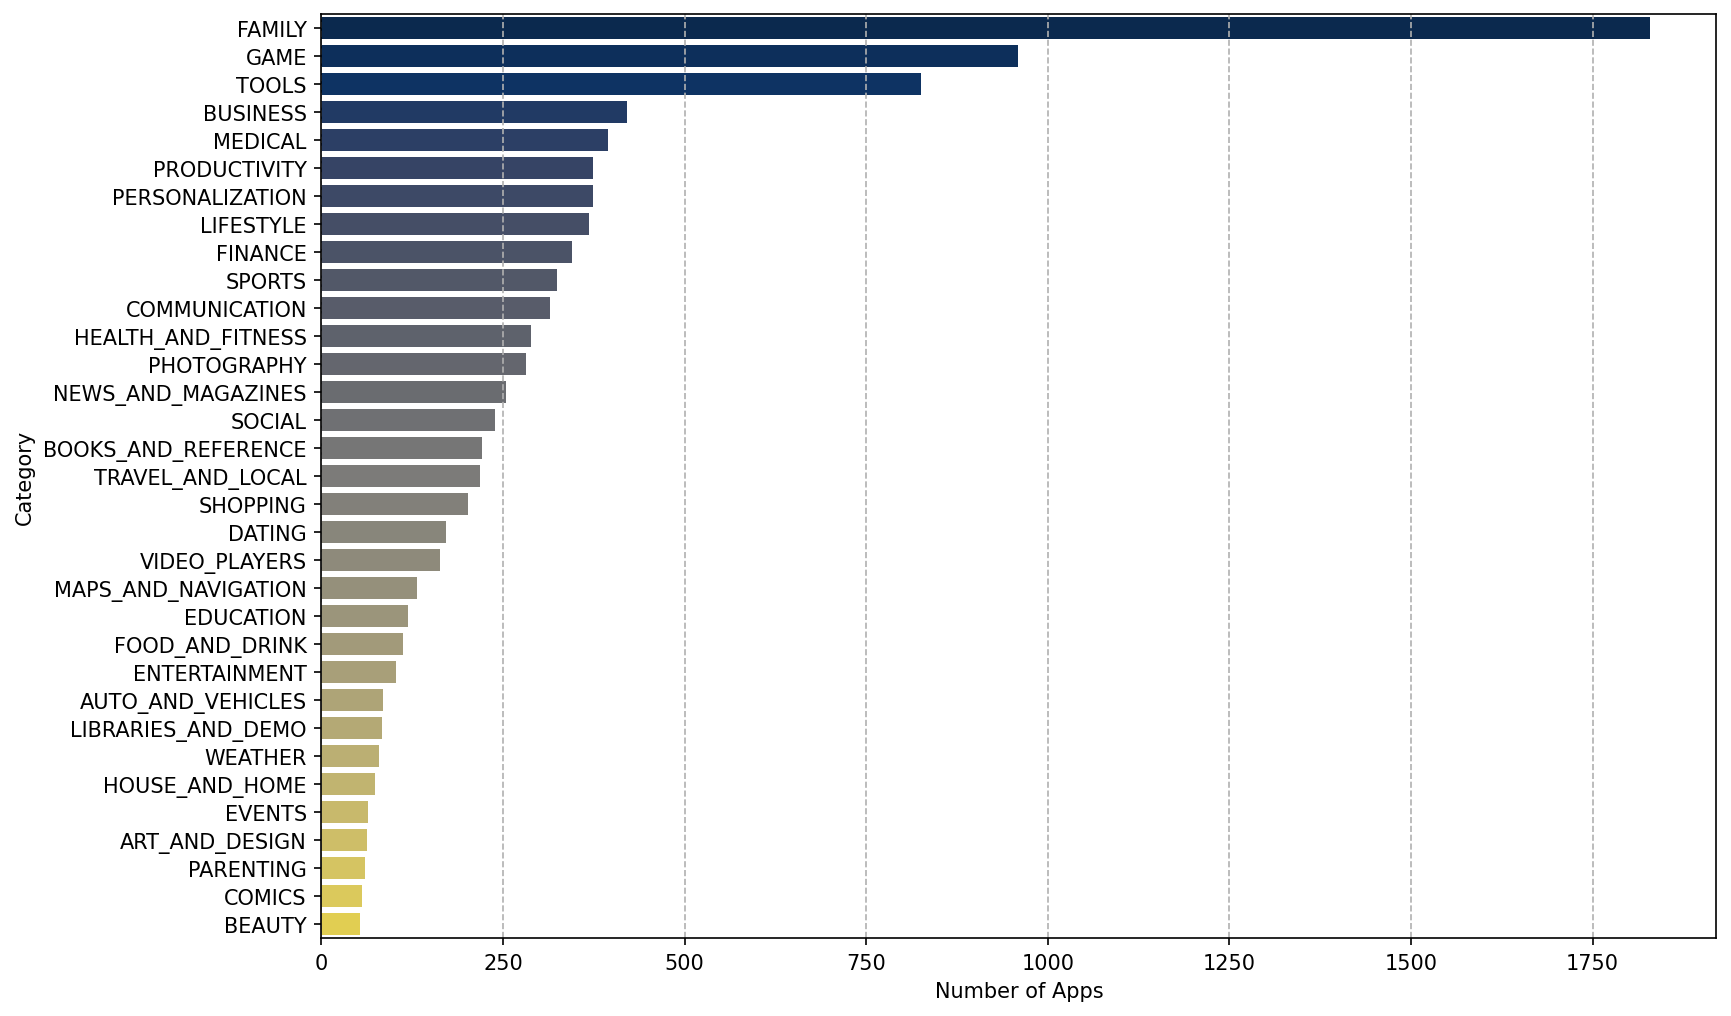

In [81]:
# Visualize Count vs Category
plt.figure(figsize=(12,8), dpi=150)
sns.barplot(y=sorted_categories.index,
            x=sorted_categories.values,
            palette="cividis")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.grid(axis="x", ls="--")

In [82]:
# percentage of top 3 categories
round(float(sorted_categories.head(3).values.sum() / len(google_play_store_df) * 100), 2)

37.44

The top category is clearly FAMILY, with 1829 apps. GAME and TOOLS are also important categories based on their frequency. Together, these three categories make up nearly 40% of all the apps. In contrast, PARENTING, EVENTS and BEAUTY have significantly fewer apps.

## 4.2. What is the distribution of ratings by application type?

In [83]:
google_play_store_df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [84]:
google_play_store_df["Rating"].mean()

np.float64(4.192475904238781)

In [85]:
google_play_store_df.groupby("Type")["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8896.0,4.186095,0.495601,1.0,4.0,4.3,4.5,5.0
Paid,753.0,4.267862,0.501570,1.0,4.2,4.3,4.6,5.0


/tmp/ipython-input-3739883697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Type", y="Rating", data=google_play_store_df, palette="cividis")


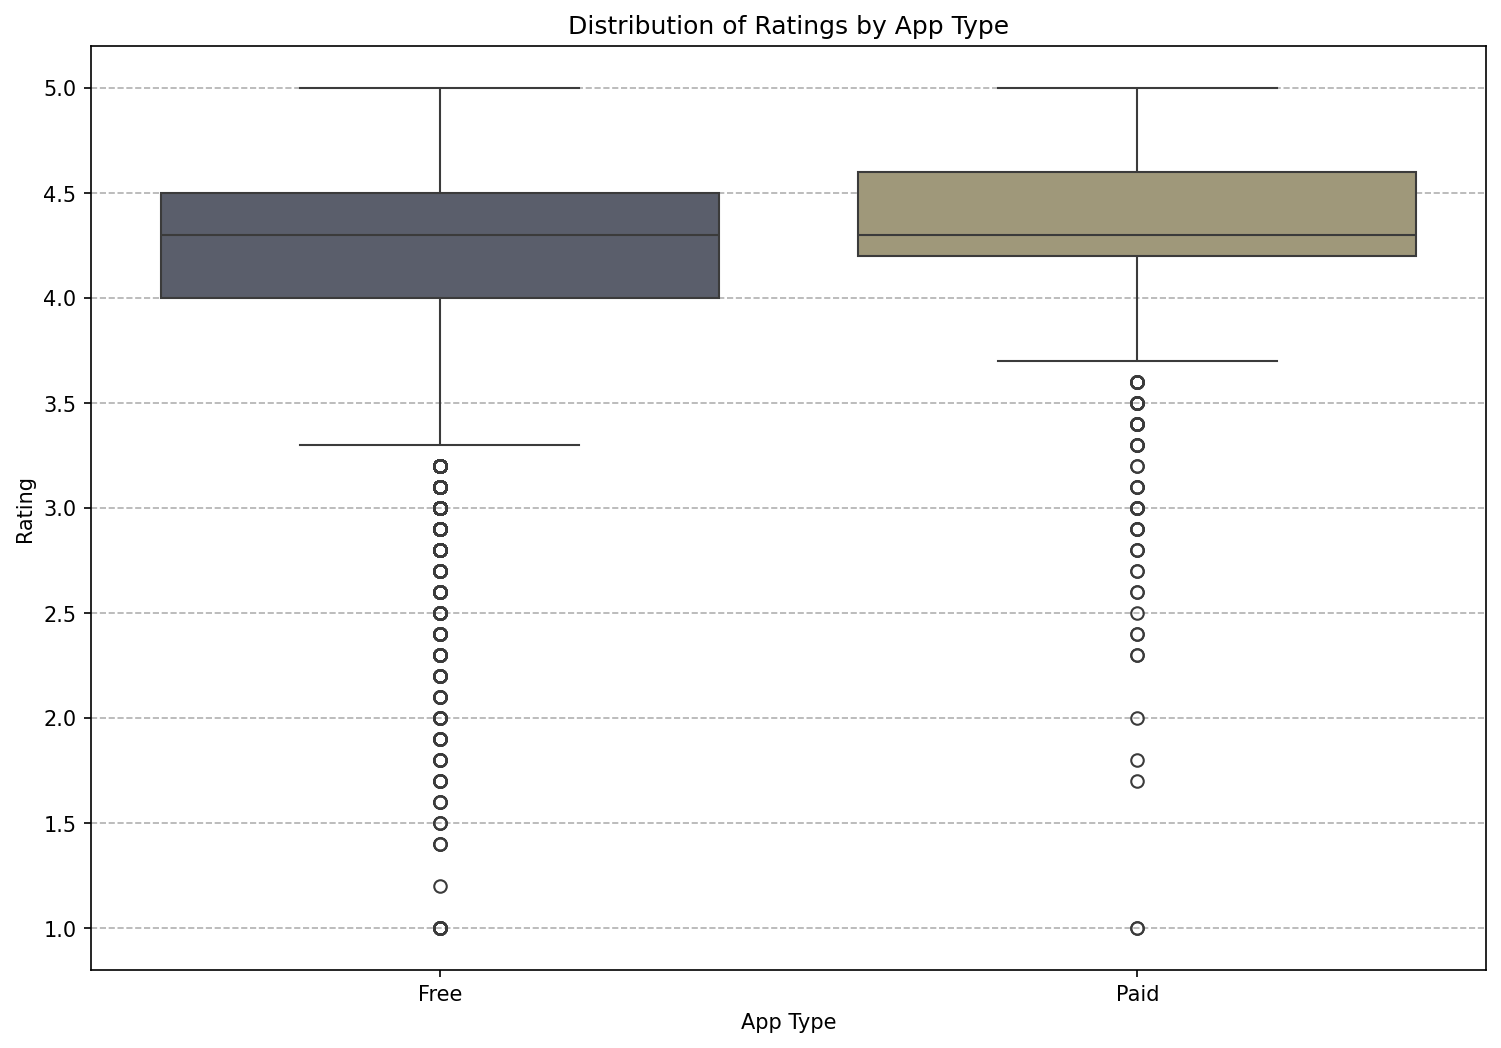

In [86]:
plt.figure(figsize=(12, 8), dpi=150)
sns.boxplot(x="Type", y="Rating", data=google_play_store_df, palette="cividis")
plt.title("Distribution of Ratings by App Type")
plt.xlabel("App Type")
plt.ylabel("Rating")
plt.grid(axis="y", linestyle="--")

The boxplot shows how user ratings differ between Free and Paid apps.
Both types have high ratings overall, mostly between 4.0 and 4.5, which indicates that users are generally satisfied. But, Paid apps have a slightly higher median rating (4.4 vs. 4.3) and a narrower range, meaning their ratings are more consistent. In contrast, Free apps show a wider spread with more low-rating outliers, suggesting that some free apps deliver lower quality or poorer user experience. This pattern is reasonable since users tend to rate paid apps more carefully, while free apps attract a broader and more varied audience (based on the number of free apps and paid apps).

## 4.3. What are the categories of ratings and their counts?

I classified the rating categories as follows:

[0,2] -> Poor

[2,3] -> Below Average

[3-4] -> Average

[4-4.5] -> Good

[4.5-5] -> Exceptional

In [87]:
ratings_cat = pd.cut(google_play_store_df["Rating"],
                     bins = [0, 2, 3, 4, 4.5, 5],
                     labels = ["Poor", "Below Average", "Average", "Good", "Exceptional"])

In [88]:
ratings_cat.value_counts().sort_index()

,count
Rating,
Poor,66
Below Average,294
Average,2061
Good,5526
Exceptional,1702


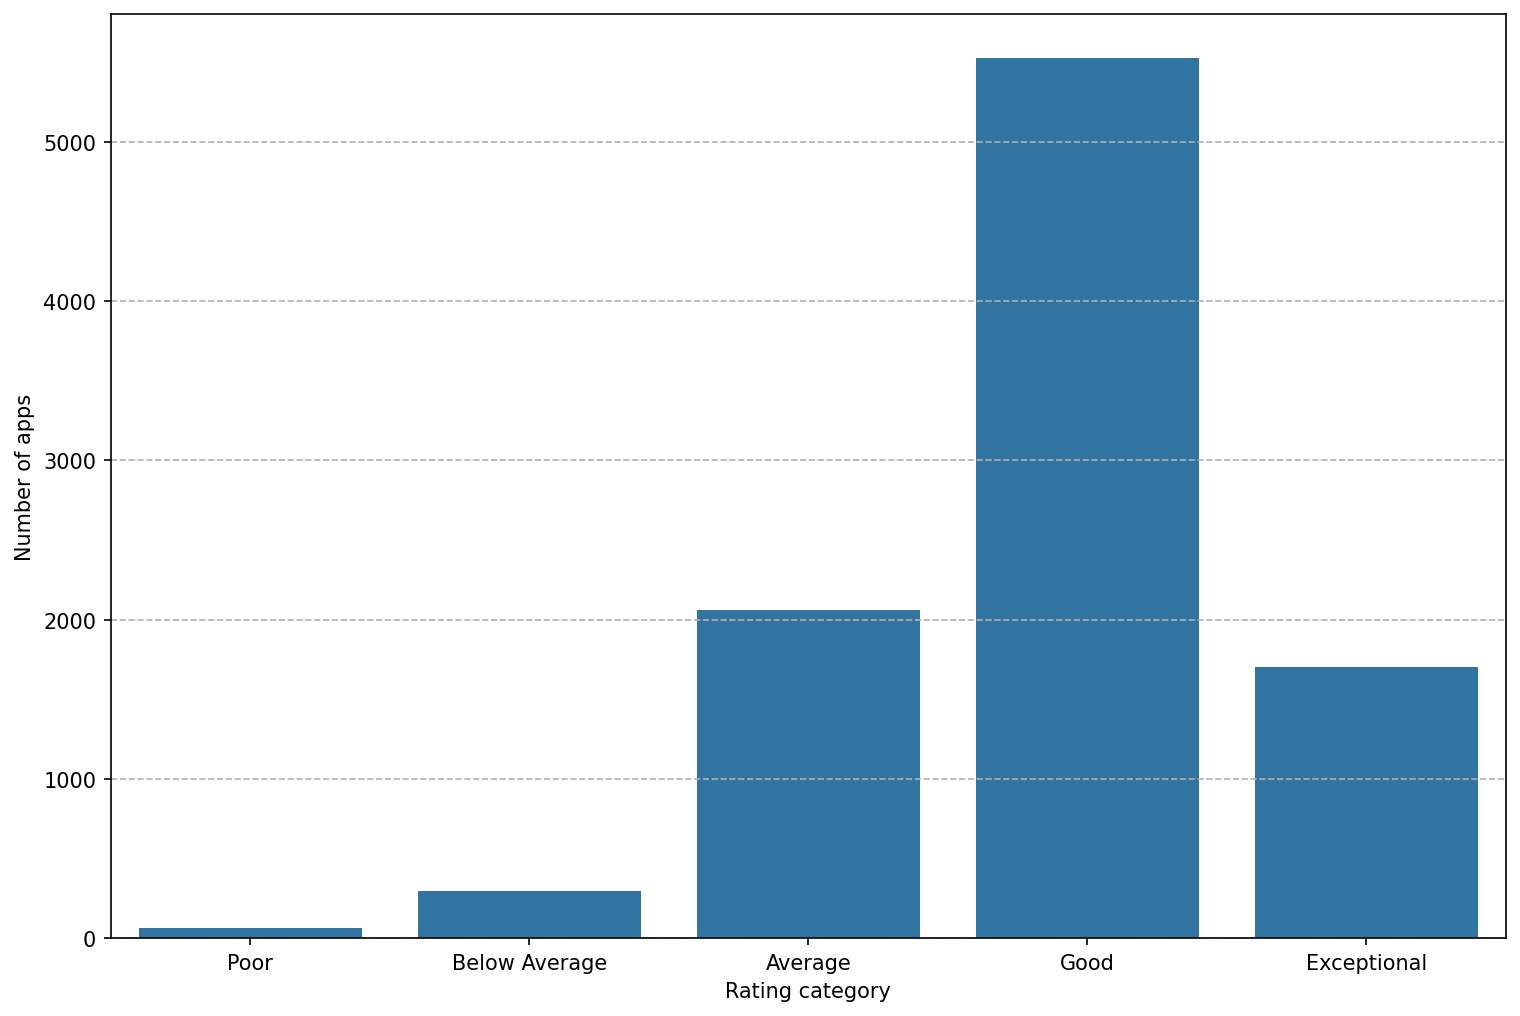

In [89]:
plt.figure(figsize=(12,8), dpi=150)
sns.barplot(ratings_cat.value_counts().sort_index())
plt.xlabel("Rating category")
plt.ylabel("Number of apps")
plt.grid(axis="y", ls="--")

------